In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mnist_train = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

Processing...
Done!


In [5]:
mnist_train.train_data.size(), mnist_test.test_data.size()

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [6]:
batch_size = 100

In [7]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, num_workers=1)

In [9]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512, bias=True)
        self.fc2 = nn.Linear(512, 10, bias=True)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [16]:
model = NeuralNet()
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
num_epochs = 5

In [18]:
for epoch in range(num_epochs):
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(mnist_train) // batch_size, cost.item()))

Epoch [1/5], lter [100/600], Loss: 0.3072
Epoch [1/5], lter [200/600], Loss: 0.2825
Epoch [1/5], lter [300/600], Loss: 0.1029
Epoch [1/5], lter [400/600], Loss: 0.1580
Epoch [1/5], lter [500/600], Loss: 0.1006
Epoch [1/5], lter [600/600], Loss: 0.1034
Epoch [2/5], lter [100/600], Loss: 0.0777
Epoch [2/5], lter [200/600], Loss: 0.0847
Epoch [2/5], lter [300/600], Loss: 0.1488
Epoch [2/5], lter [400/600], Loss: 0.0589
Epoch [2/5], lter [500/600], Loss: 0.1203
Epoch [2/5], lter [600/600], Loss: 0.0897
Epoch [3/5], lter [100/600], Loss: 0.0776
Epoch [3/5], lter [200/600], Loss: 0.1122
Epoch [3/5], lter [300/600], Loss: 0.0811
Epoch [3/5], lter [400/600], Loss: 0.0209
Epoch [3/5], lter [500/600], Loss: 0.0473
Epoch [3/5], lter [600/600], Loss: 0.0706
Epoch [4/5], lter [100/600], Loss: 0.0841
Epoch [4/5], lter [200/600], Loss: 0.0265
Epoch [4/5], lter [300/600], Loss: 0.0501
Epoch [4/5], lter [400/600], Loss: 0.0512
Epoch [4/5], lter [500/600], Loss: 0.0186
Epoch [4/5], lter [600/600], Loss:

In [21]:
model.eval()

correct = 0
total = 0

for images, labels in mnist_test:
    images = images.view(-1, 28 * 28)
    output = model(images)
    
    _, predicted = torch.max(output.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy: %f %%' % (100 * float(correct) / total))

Accuracy: 97.900000 %


In [22]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1,28*28).float()
Y_single_data = mnist_test.test_labels[r:r + 1]

Label :  [7]
Prediction :  [7]


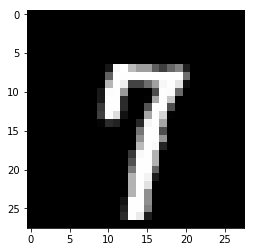

In [23]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())

Prediction :  [3]


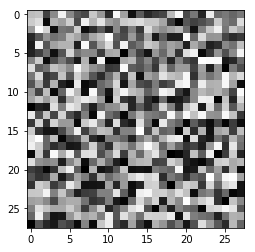

In [24]:
blackbox = torch.rand(X_single_data.size())
blackbox_pre = model(blackbox)

plt.imshow(blackbox.data.view(28,28).numpy(), cmap='gray')

print('Prediction : ', torch.max(blackbox_pre.data, 1)[1].numpy())